<a href="https://colab.research.google.com/github/202203019/Daily_Euro_Exchange_Rate/blob/main/Euro_To_INR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv('https://raw.githubusercontent.com/202203019/Lab-1/refs/heads/main/euro-daily-hist_1999_2022.csv')



df = df.rename(columns={'Period\\Unit:': 'Date'})

df['Date'] = pd.to_datetime(df['Date'])


print("\nAfter renaming:")
print(df.head())
print("Data shape:", df.shape)
print("Columns:", df.columns)
print("Date range:", df['Date'].min(), "to", df['Date'].max())
print("Missing values:\n", df.isnull().sum())

Original columns: ['Period\\Unit:', '[Australian dollar ]', '[Bulgarian lev ]', '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]', '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]', '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]', '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]', '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]', '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]', '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]', '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]', '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]', '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]', '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]', '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]', '[South African rand ]']

After renaming:
        Date [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0 2024-09-27                1.618       

In [ ]:
df['[Indian rupee ]']

,[Indian rupee ]
0,93.384
1,93.297
2,93.575
3,93.151
4,92.8955
...,...
6650,NaN
6651,NaN
6652,NaN
6653,NaN


In [ ]:
df = df[df['Date'] >= '2000-01-13']

In [ ]:
df.isnull().sum()

,0
Date,0
[Australian dollar ],0
[Bulgarian lev ],134
[Brazilian real ],0
[Canadian dollar ],0
[Swiss franc ],0
[Chinese yuan renminbi ],0
[Cypriot pound ],4309
[Czech koruna ],0
[Danish krone ],0


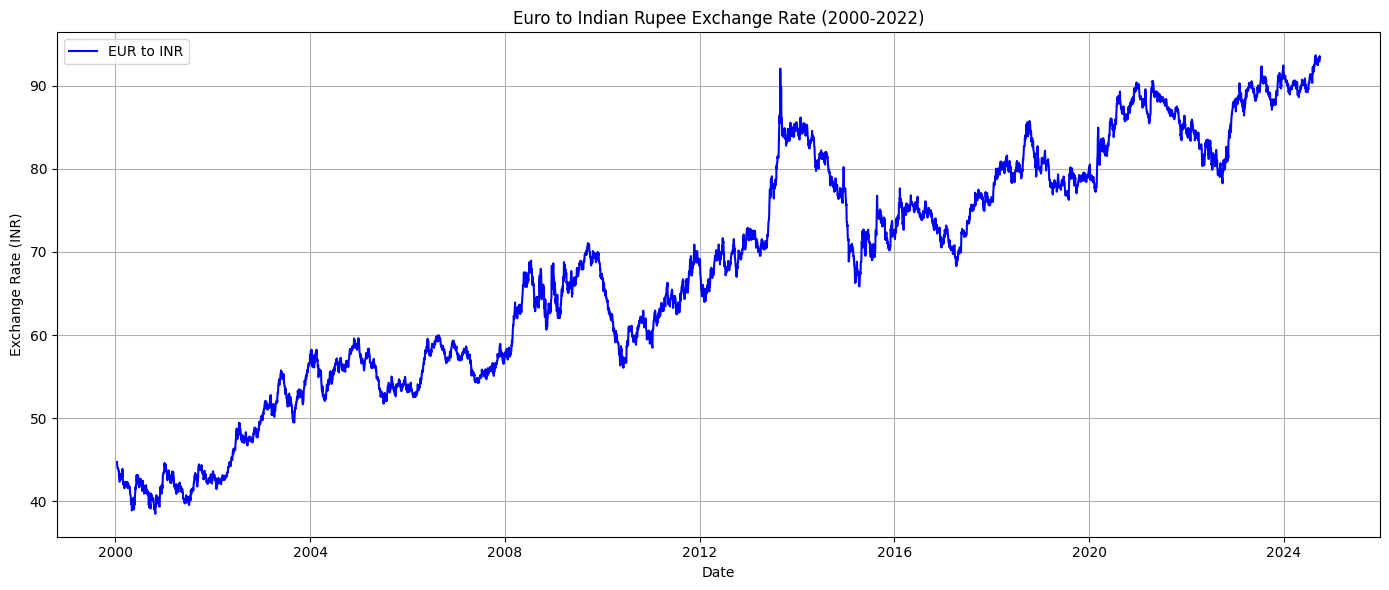

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/202203019/Lab-1/refs/heads/main/euro-daily-hist_1999_2022.csv')

df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

df_inr = df[['Date', '[Indian rupee ]']].copy()

df_inr['Date'] = pd.to_datetime(df_inr['Date'], errors='coerce')

df_inr['[Indian rupee ]'] = pd.to_numeric(df_inr['[Indian rupee ]'], errors='coerce')

df_inr = df_inr[df_inr['Date'] >= '2000-01-13']

df_inr.dropna(inplace=True)

df_inr.sort_values('Date', inplace=True)

plt.figure(figsize=(14, 6))
plt.plot(df_inr['Date'], df_inr['[Indian rupee ]'], color='blue', label='EUR to INR')
plt.title('Euro to Indian Rupee Exchange Rate (2000-2022)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (INR)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Stationarity

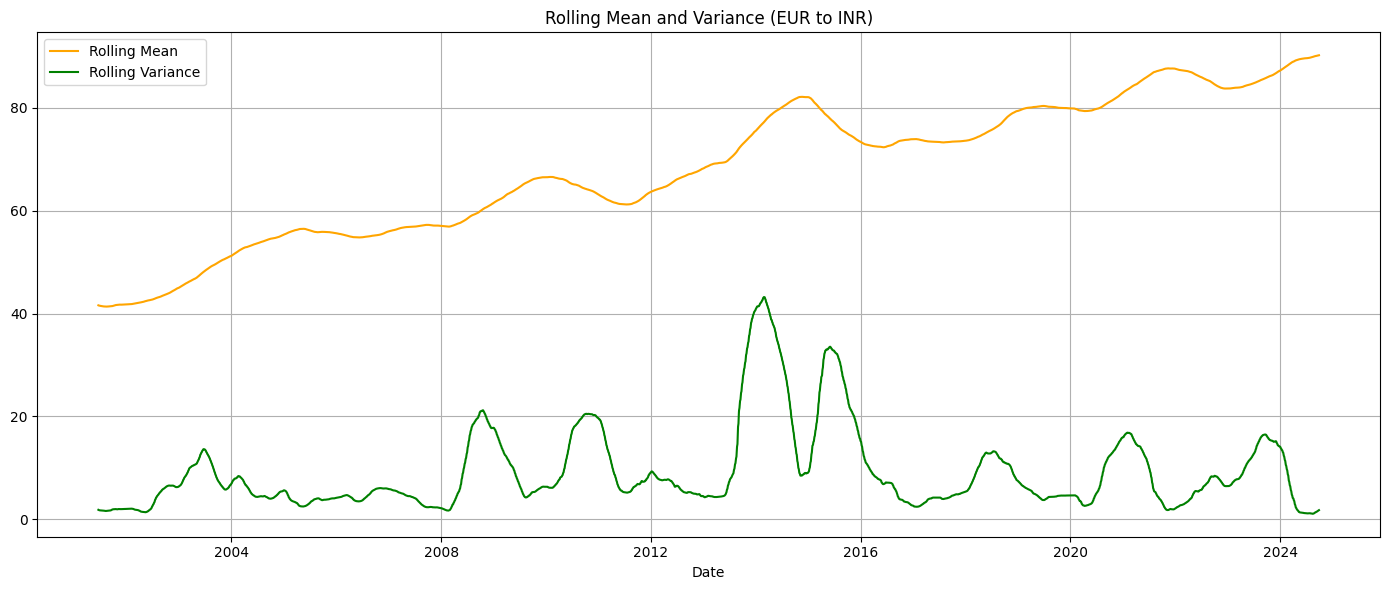

In [ ]:
window = 365
df_inr['RollingMean'] = df_inr['[Indian rupee ]'].rolling(window).mean()
df_inr['RollingVar'] = df_inr['[Indian rupee ]'].rolling(window).var()

plt.figure(figsize=(14, 6))
plt.plot(df_inr['Date'], df_inr['RollingMean'], label='Rolling Mean', color='orange')
plt.plot(df_inr['Date'], df_inr['RollingVar'], label='Rolling Variance', color='green')
plt.title('Rolling Mean and Variance (EUR to INR)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


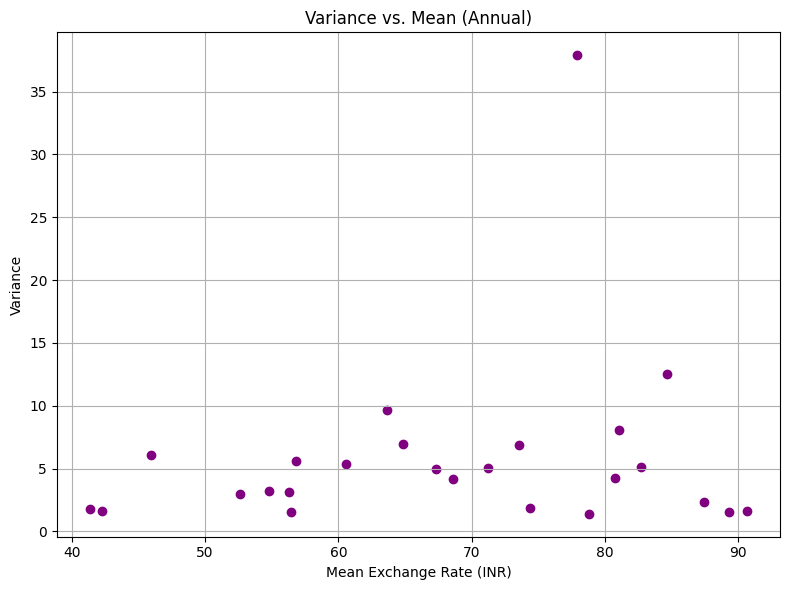

In [ ]:
df_inr['Year'] = df_inr['Date'].dt.year
grouped = df_inr.groupby('Year')['[Indian rupee ]']

means = grouped.mean()
variances = grouped.var()

plt.figure(figsize=(8, 6))
plt.scatter(means, variances, color='purple')
plt.title('Variance vs. Mean (Annual)')
plt.xlabel('Mean Exchange Rate (INR)')
plt.ylabel('Variance')
plt.grid(True)
plt.tight_layout()
plt.show()


# Log transformation

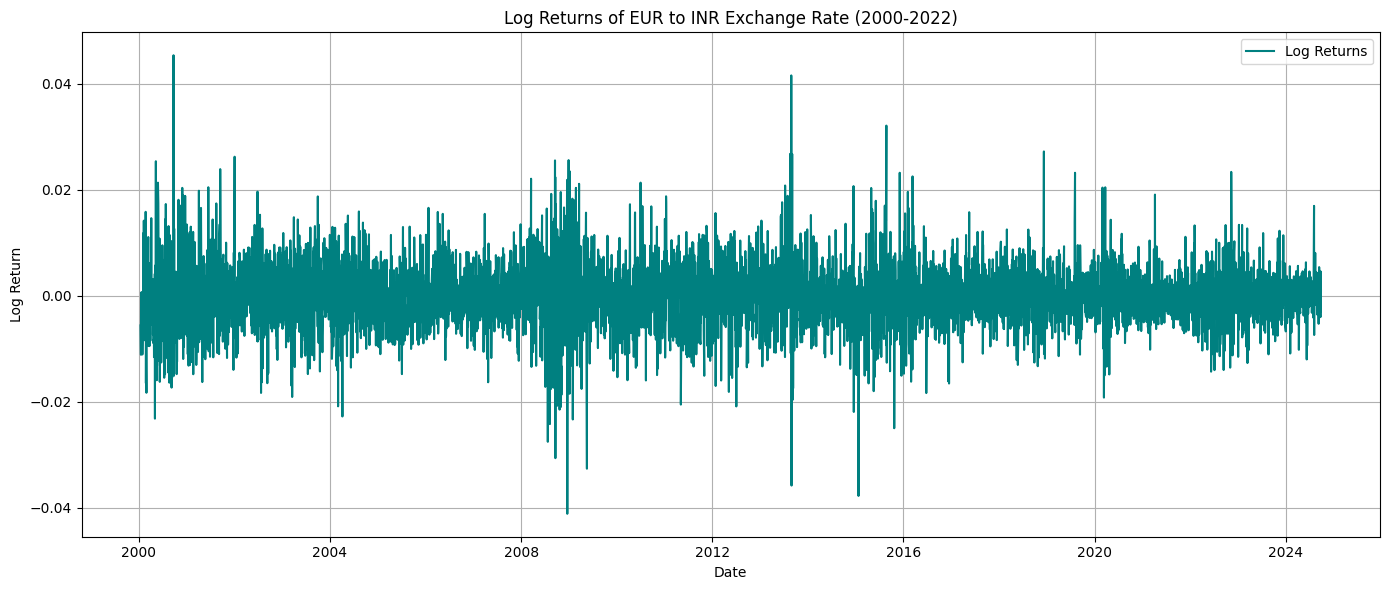

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_inr['Log_Returns'] = np.log(df_inr['[Indian rupee ]'] / df_inr['[Indian rupee ]'].shift(1))

df_inr.dropna(subset=['Log_Returns'], inplace=True)

plt.figure(figsize=(14, 6))
plt.plot(df_inr['Date'], df_inr['Log_Returns'], color='teal', label='Log Returns')
plt.title('Log Returns of EUR to INR Exchange Rate (2000-2022)')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(df_inr['Log_Returns'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[1] < 0.05:
    print("\n✅ The series is likely stationary (reject null hypothesis).")
else:
    print("\n❌ The series is likely non-stationary (fail to reject null hypothesis).")


ADF Statistic: -25.089622285727447
p-value: 0.0
Critical Values:
   1%: -3.4313861039798947
   5%: -2.8619978668954196
   10%: -2.5670137194938842

✅ The series is likely stationary (reject null hypothesis).


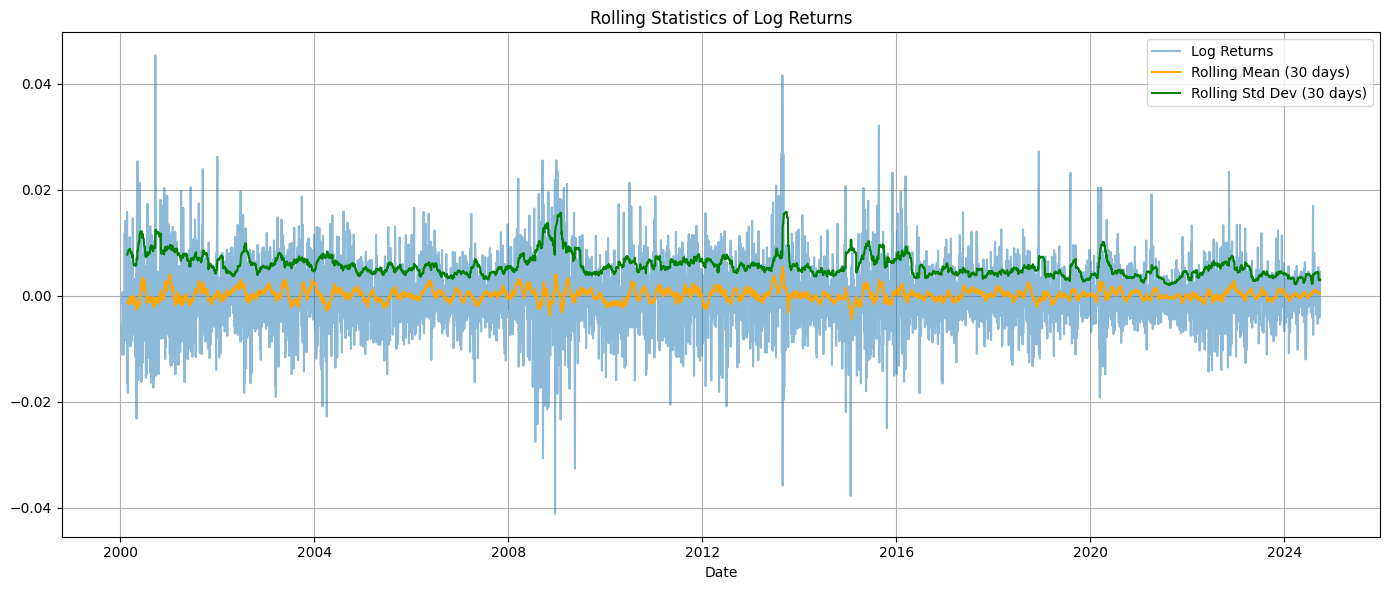

In [ ]:
rolling_mean = df_inr['Log_Returns'].rolling(window=30).mean()
rolling_std = df_inr['Log_Returns'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(df_inr['Date'], df_inr['Log_Returns'], label='Log Returns', alpha=0.5)
plt.plot(df_inr['Date'], rolling_mean, label='Rolling Mean (30 days)', color='orange')
plt.plot(df_inr['Date'], rolling_std, label='Rolling Std Dev (30 days)', color='green')
plt.title('Rolling Statistics of Log Returns')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Cross-Correlation

Correlation between EUR/USD and EUR/INR: 0.1657
Covariance between EUR/USD and EUR/INR: 0.3768


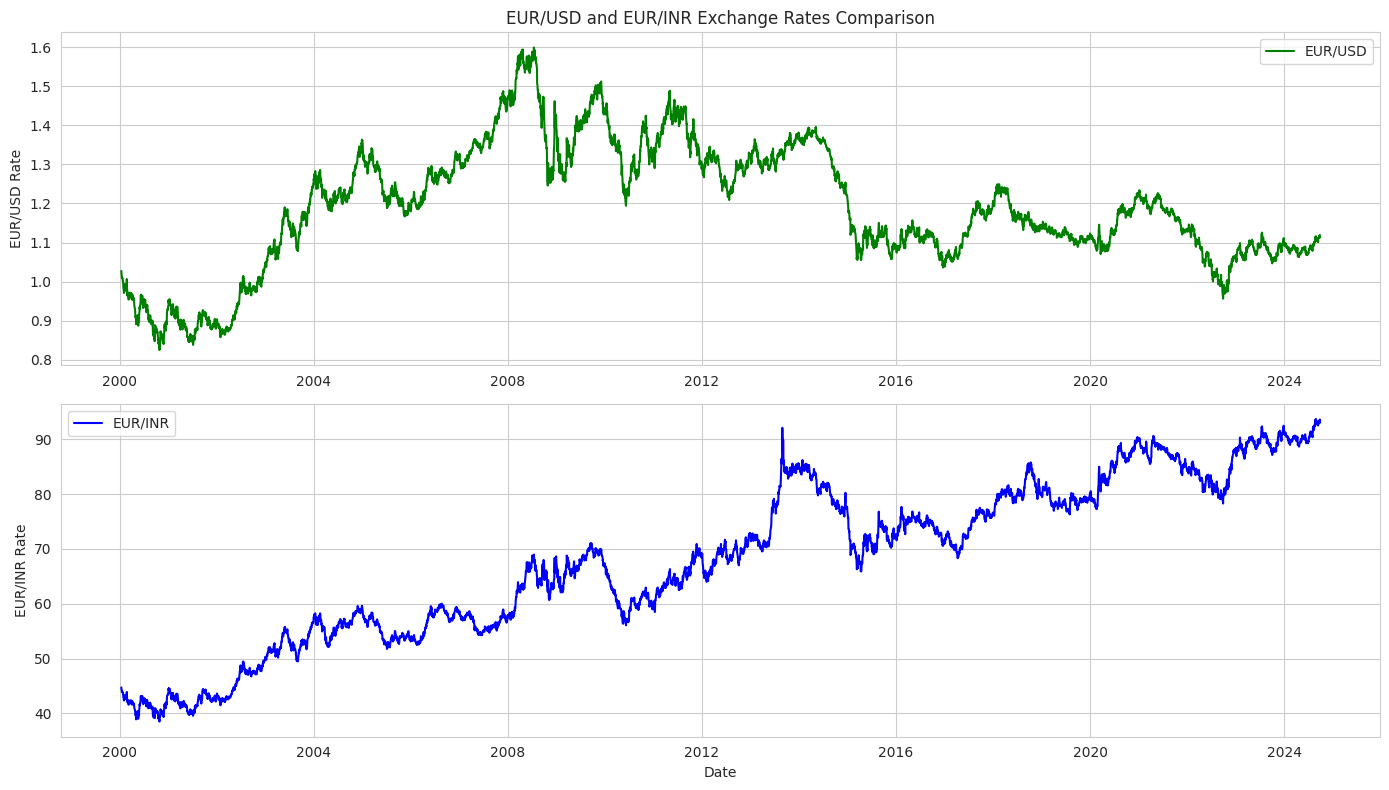

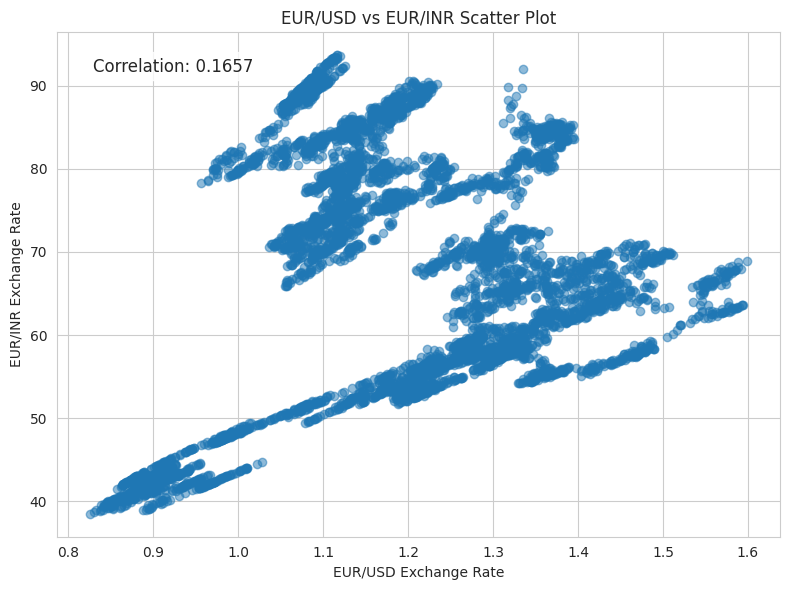

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/202203019/Lab-1/refs/heads/main/euro-daily-hist_1999_2022.csv')
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

df_usd = df[['Date', '[US dollar ]']].copy()
df_usd['Date'] = pd.to_datetime(df_usd['Date'], errors='coerce')
df_usd['[US dollar ]'] = pd.to_numeric(df_usd['[US dollar ]'], errors='coerce')
df_usd.dropna(inplace=True)
df_usd.sort_values('Date', inplace=True)

df_inr = df[['Date', '[Indian rupee ]']].copy()
df_inr['Date'] = pd.to_datetime(df_inr['Date'], errors='coerce')
df_inr['[Indian rupee ]'] = pd.to_numeric(df_inr['[Indian rupee ]'], errors='coerce')
df_inr = df_inr[df_inr['Date'] >= '2000-01-13']
df_inr.dropna(inplace=True)
df_inr.sort_values('Date', inplace=True)

merged_df = pd.merge(df_usd, df_inr, on='Date', how='inner')

correlation = merged_df['[US dollar ]'].corr(merged_df['[Indian rupee ]'])
covariance = merged_df['[US dollar ]'].cov(merged_df['[Indian rupee ]'])

print(f"Correlation between EUR/USD and EUR/INR: {correlation:.4f}")
print(f"Covariance between EUR/USD and EUR/INR: {covariance:.4f}")

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(merged_df['Date'], merged_df['[US dollar ]'], color='green', label='EUR/USD')
plt.title('EUR/USD and EUR/INR Exchange Rates Comparison')
plt.ylabel('EUR/USD Rate')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_df['Date'], merged_df['[Indian rupee ]'], color='blue', label='EUR/INR')
plt.xlabel('Date')
plt.ylabel('EUR/INR Rate')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['[US dollar ]'], merged_df['[Indian rupee ]'], alpha=0.5)
plt.title('EUR/USD vs EUR/INR Scatter Plot')
plt.xlabel('EUR/USD Exchange Rate')
plt.ylabel('EUR/INR Exchange Rate')
plt.grid(True)

plt.text(0.05, 0.95, f'Correlation: {correlation:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

Top 5 most cross-correlated unique currency pairs:
[US dollar ] & [Chinese yuan renminbi ]: 1.0000
[Lithuanian litas ] & [Hong Kong dollar ]: 0.9999
[US dollar ] & [Hong Kong dollar ]: 0.9998
[Hong Kong dollar ] & [Chinese yuan renminbi ]: 0.9998
[US dollar ] & [Lithuanian litas ]: 0.9998


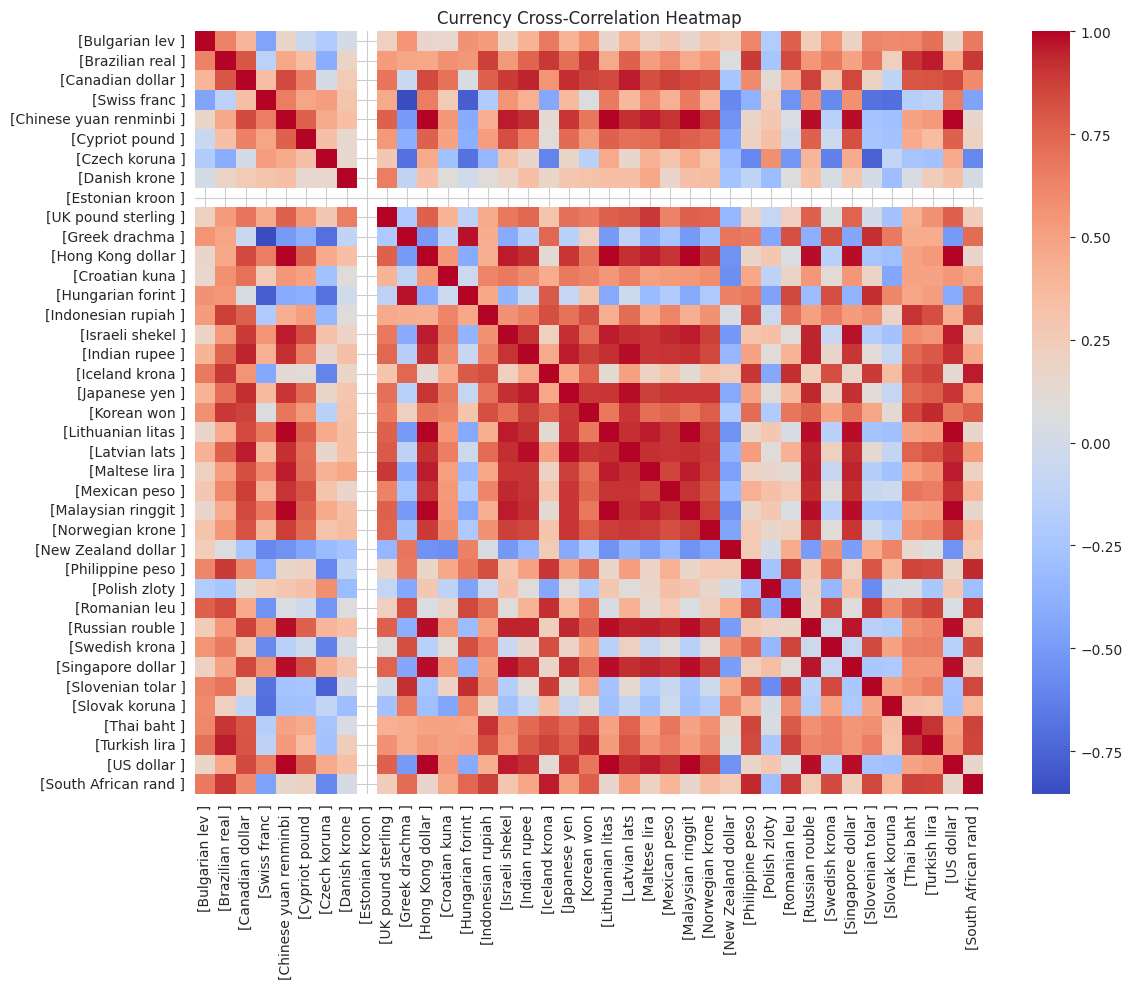

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = 'https://raw.githubusercontent.com/202203019/Lab-1/refs/heads/main/euro-daily-hist_1999_2022.csv'
df = pd.read_csv(url)

df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

currency_cols = df.columns[1:]
for col in currency_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)

correlation_matrix = df[currency_cols].corr()

upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

top_5_pairs = (
    upper_tri.unstack()
    .dropna()
    .abs()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 most cross-correlated unique currency pairs:")
for (curr1, curr2), _ in top_5_pairs.items():
    corr_value = correlation_matrix.loc[curr1, curr2]
    print(f"{curr1} & {curr2}: {corr_value:.4f}")

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Currency Cross-Correlation Heatmap")
plt.tight_layout()
plt.show()


# Trends and seasonality

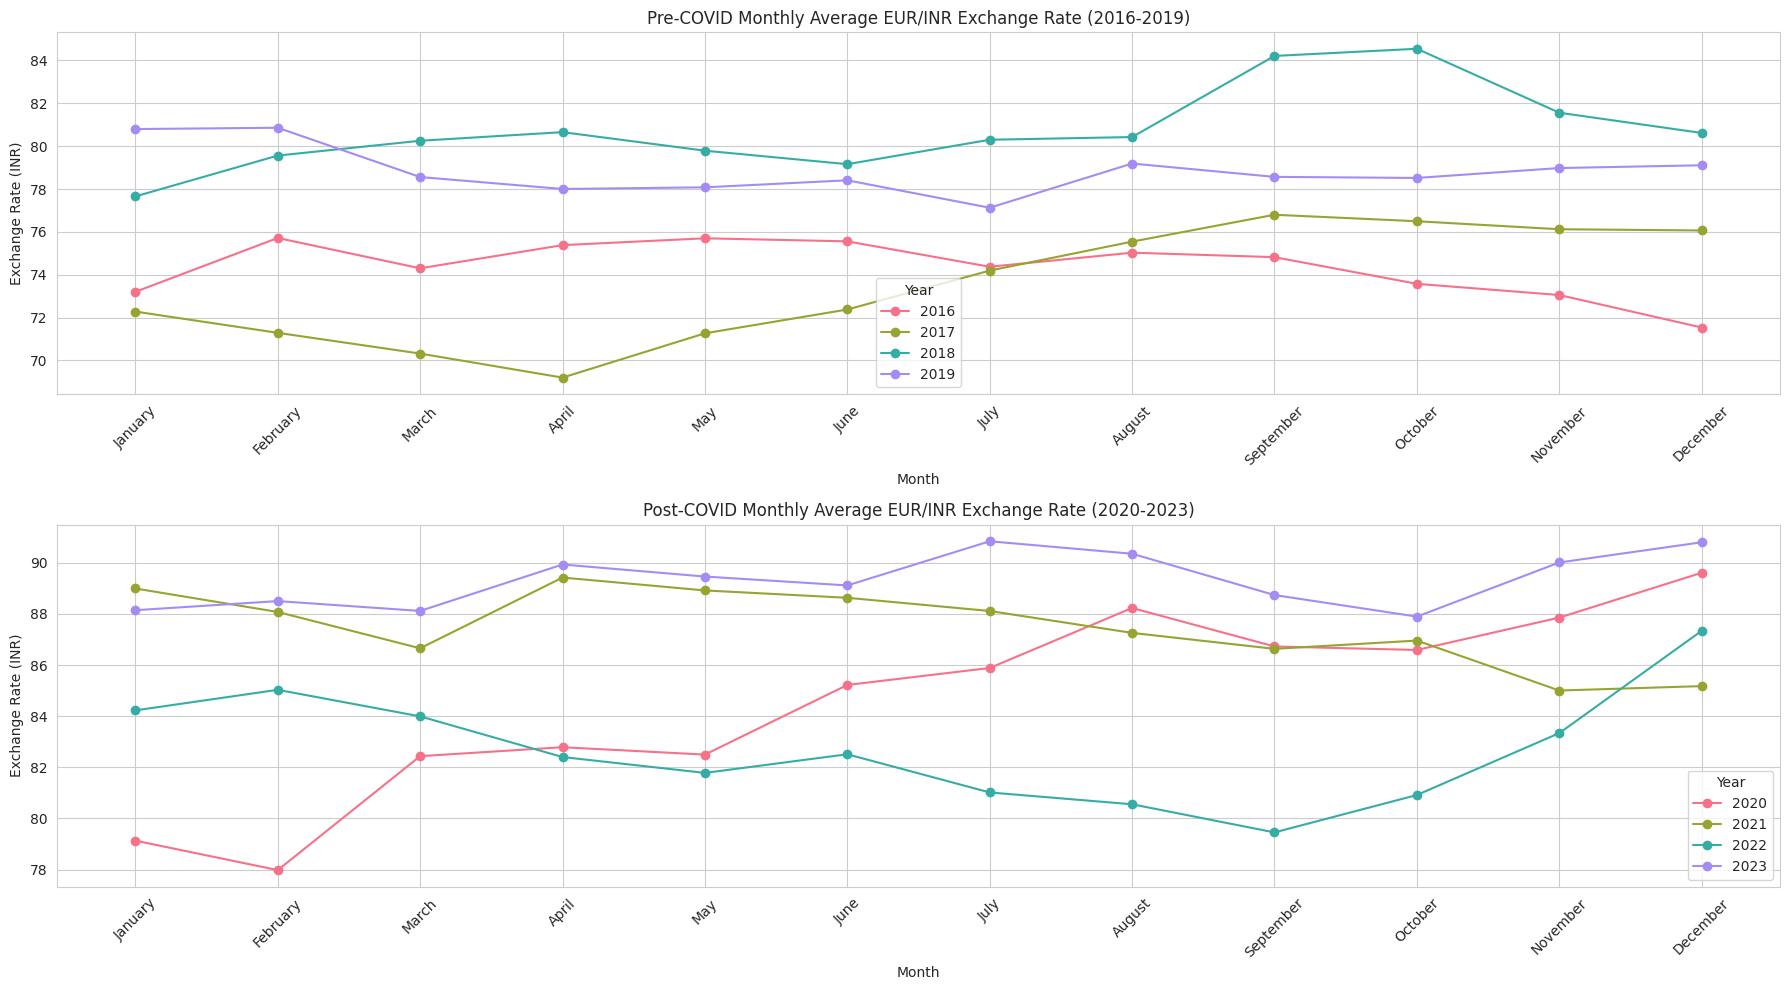

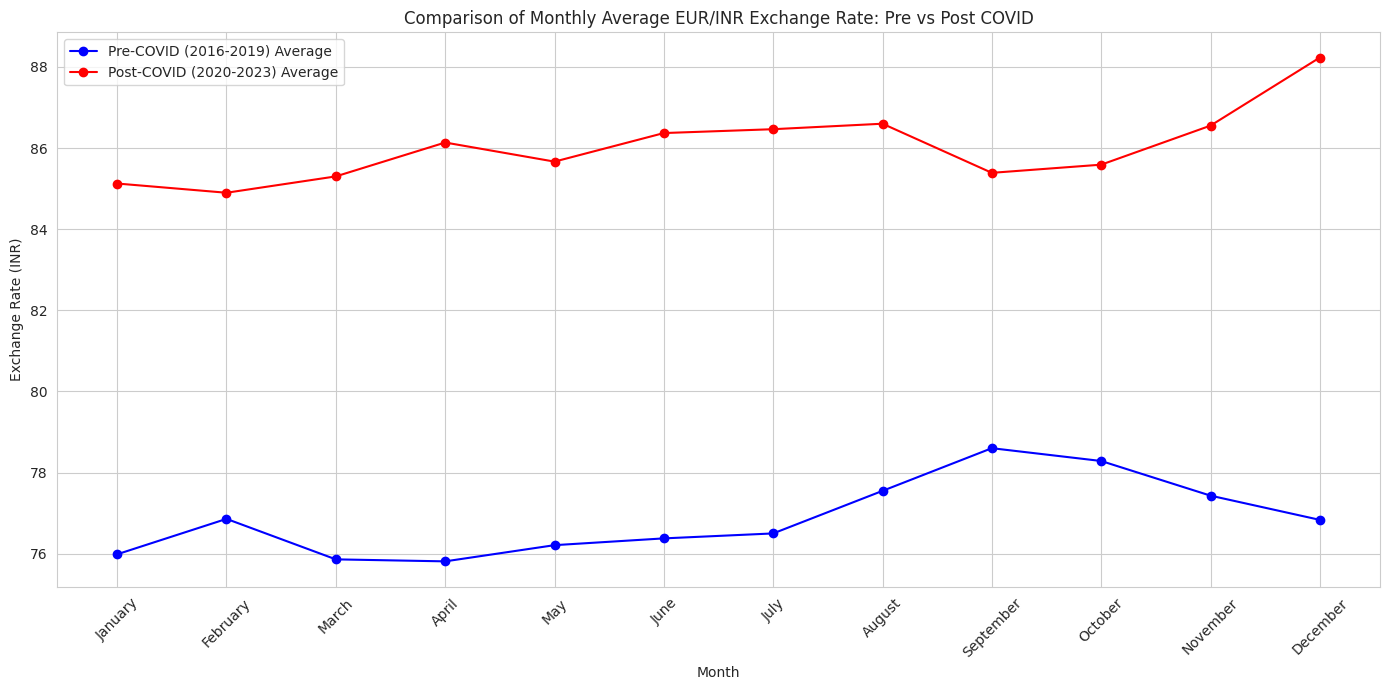

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/202203019/Lab-1/refs/heads/main/euro-daily-hist_1999_2022.csv')

df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

df_inr = df[['Date', '[Indian rupee ]']].copy()

df_inr['Date'] = pd.to_datetime(df_inr['Date'], errors='coerce')

df_inr['[Indian rupee ]'] = pd.to_numeric(df_inr['[Indian rupee ]'], errors='coerce')

df_inr.dropna(inplace=True)

df_inr['Year'] = df_inr['Date'].dt.year
df_inr['Month'] = df_inr['Date'].dt.month
df_inr['Month_Name'] = df_inr['Date'].dt.month_name()

pre_covid = df_inr[(df_inr['Year'] >= 2016) & (df_inr['Year'] <= 2019)]
post_covid = df_inr[(df_inr['Year'] >= 2020) & (df_inr['Year'] <= 2023)]

pre_monthly = pre_covid.groupby(['Year', 'Month', 'Month_Name'])['[Indian rupee ]'].mean().reset_index()
post_monthly = post_covid.groupby(['Year', 'Month', 'Month_Name'])['[Indian rupee ]'].mean().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']


plt.figure(figsize=(18, 10))
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 4)

plt.subplot(2, 1, 1)
for i, year in enumerate([2016, 2017, 2018, 2019]):
    year_data = pre_monthly[pre_monthly['Year'] == year]
    complete_months = pd.DataFrame({'Month_Name': month_order})
    year_data_complete = complete_months.merge(year_data, on='Month_Name', how='left')
    plt.plot(year_data_complete['Month_Name'], year_data_complete['[Indian rupee ]'],
             marker='o', color=palette[i], label=str(year))

plt.title('Pre-COVID Monthly Average EUR/INR Exchange Rate (2016-2019)')
plt.xlabel('Month')
plt.ylabel('Exchange Rate (INR)')
plt.legend(title='Year')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
for i, year in enumerate([2020, 2021, 2022, 2023]):
    year_data = post_monthly[post_monthly['Year'] == year]
    complete_months = pd.DataFrame({'Month_Name': month_order})
    year_data_complete = complete_months.merge(year_data, on='Month_Name', how='left')
    plt.plot(year_data_complete['Month_Name'], year_data_complete['[Indian rupee ]'],
             marker='o', color=palette[i], label=str(year))

plt.title('Post-COVID Monthly Average EUR/INR Exchange Rate (2020-2023)')
plt.xlabel('Month')
plt.ylabel('Exchange Rate (INR)')
plt.legend(title='Year')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
pre_avg = pre_monthly.groupby('Month_Name')['[Indian rupee ]'].mean().reindex(month_order)
plt.plot(pre_avg.index, pre_avg.values, marker='o', color='blue', label='Pre-COVID (2016-2019) Average')

post_avg = post_monthly.groupby('Month_Name')['[Indian rupee ]'].mean().reindex(month_order)
plt.plot(post_avg.index, post_avg.values, marker='o', color='red', label='Post-COVID (2020-2023) Average')

plt.title('Comparison of Monthly Average EUR/INR Exchange Rate: Pre vs Post COVID')
plt.xlabel('Month')
plt.ylabel('Exchange Rate (INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def calculate_mean(series):
    total = 0.0
    count = 0
    for value in series:
        total += value
        count += 1
    return total/count

def calculate_autocorrelation(series):
    n = len(series)
    mean = calculate_mean(series)
    numerator = 0.0
    denominator = 0.0

    for t in range(n - 1):
        numerator += (series[t] - mean) * (series[t + 1] - mean)

    for t in range(n):
        denominator += (series[t] - mean) ** 2

    return numerator / denominator if denominator != 0 else 0

exchange_rates = df_inr['[Indian rupee ]'].tolist()

mean_val = calculate_mean(exchange_rates)
autocorr_val = calculate_autocorrelation(exchange_rates)

print(f"Mean (custom): {mean_val:.5f}")
print(f"Lag-1 Autocorrelation (custom): {autocorr_val:.5f}")

autocorrelation = df_inr['[Indian rupee ]'].autocorr()
mean_exchange_rate = df_inr['[Indian rupee ]'].mean()

print(f"Autocorrelation of Euro to INR exchange rate: {autocorrelation:.5f}")
print(f"Mean of Euro to INR exchange rate: {mean_exchange_rate:.5f}")

Mean (custom): 67.97172
Lag-1 Autocorrelation (custom): 0.99918
Autocorrelation of Euro to INR exchange rate: 0.99962
Mean of Euro to INR exchange rate: 67.97172


<Figure size 1000x400 with 0 Axes>

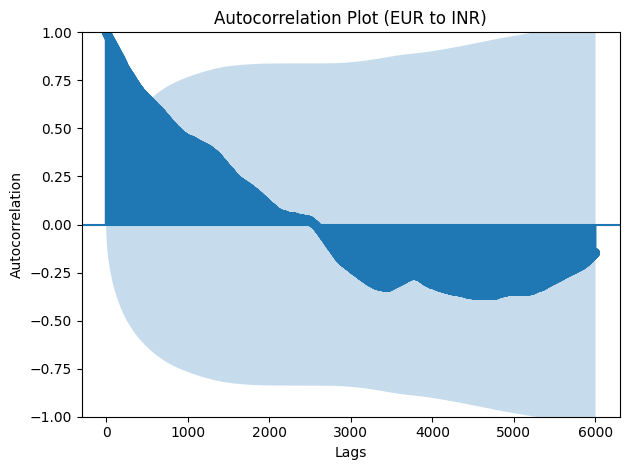

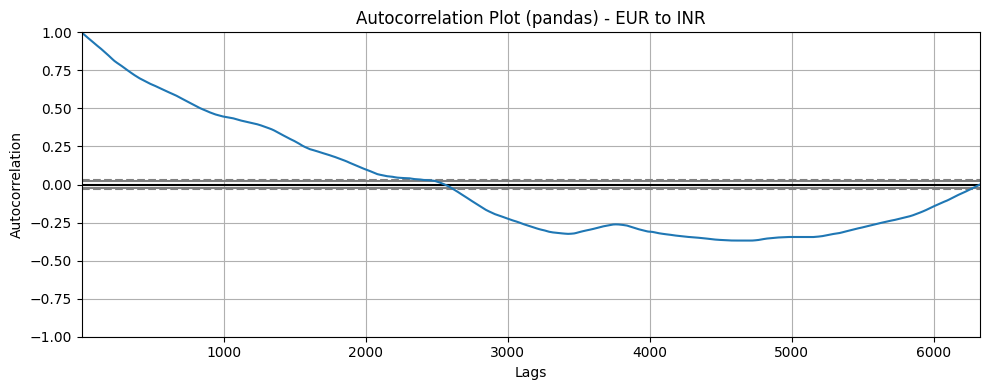

Augmented Dickey-Fuller Test for EUR/INR:
ADF Statistic: -1.01284
p-value: 0.74855
Critical Values:
   1%: -3.43139
   5%: -2.86200
   10%: -2.56701
=> The data is likely non-stationary (fail to reject H0)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 4))
plot_acf(df_inr['[Indian rupee ]'], lags=6000)
plt.title('Autocorrelation Plot (EUR to INR)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
autocorrelation_plot(df_inr['[Indian rupee ]'])
plt.title('Autocorrelation Plot (pandas) - EUR to INR')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.tight_layout()
plt.show()

adf_result = adfuller(df_inr['[Indian rupee ]'])

print('Augmented Dickey-Fuller Test for EUR/INR:')
print(f'ADF Statistic: {adf_result[0]:.5f}')
print(f'p-value: {adf_result[1]:.5f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.5f}')
if adf_result[1] < 0.05:
    print('=> The data is likely stationary (reject H0)')
else:
    print('=> The data is likely non-stationary (fail to reject H0)')

#Moving average

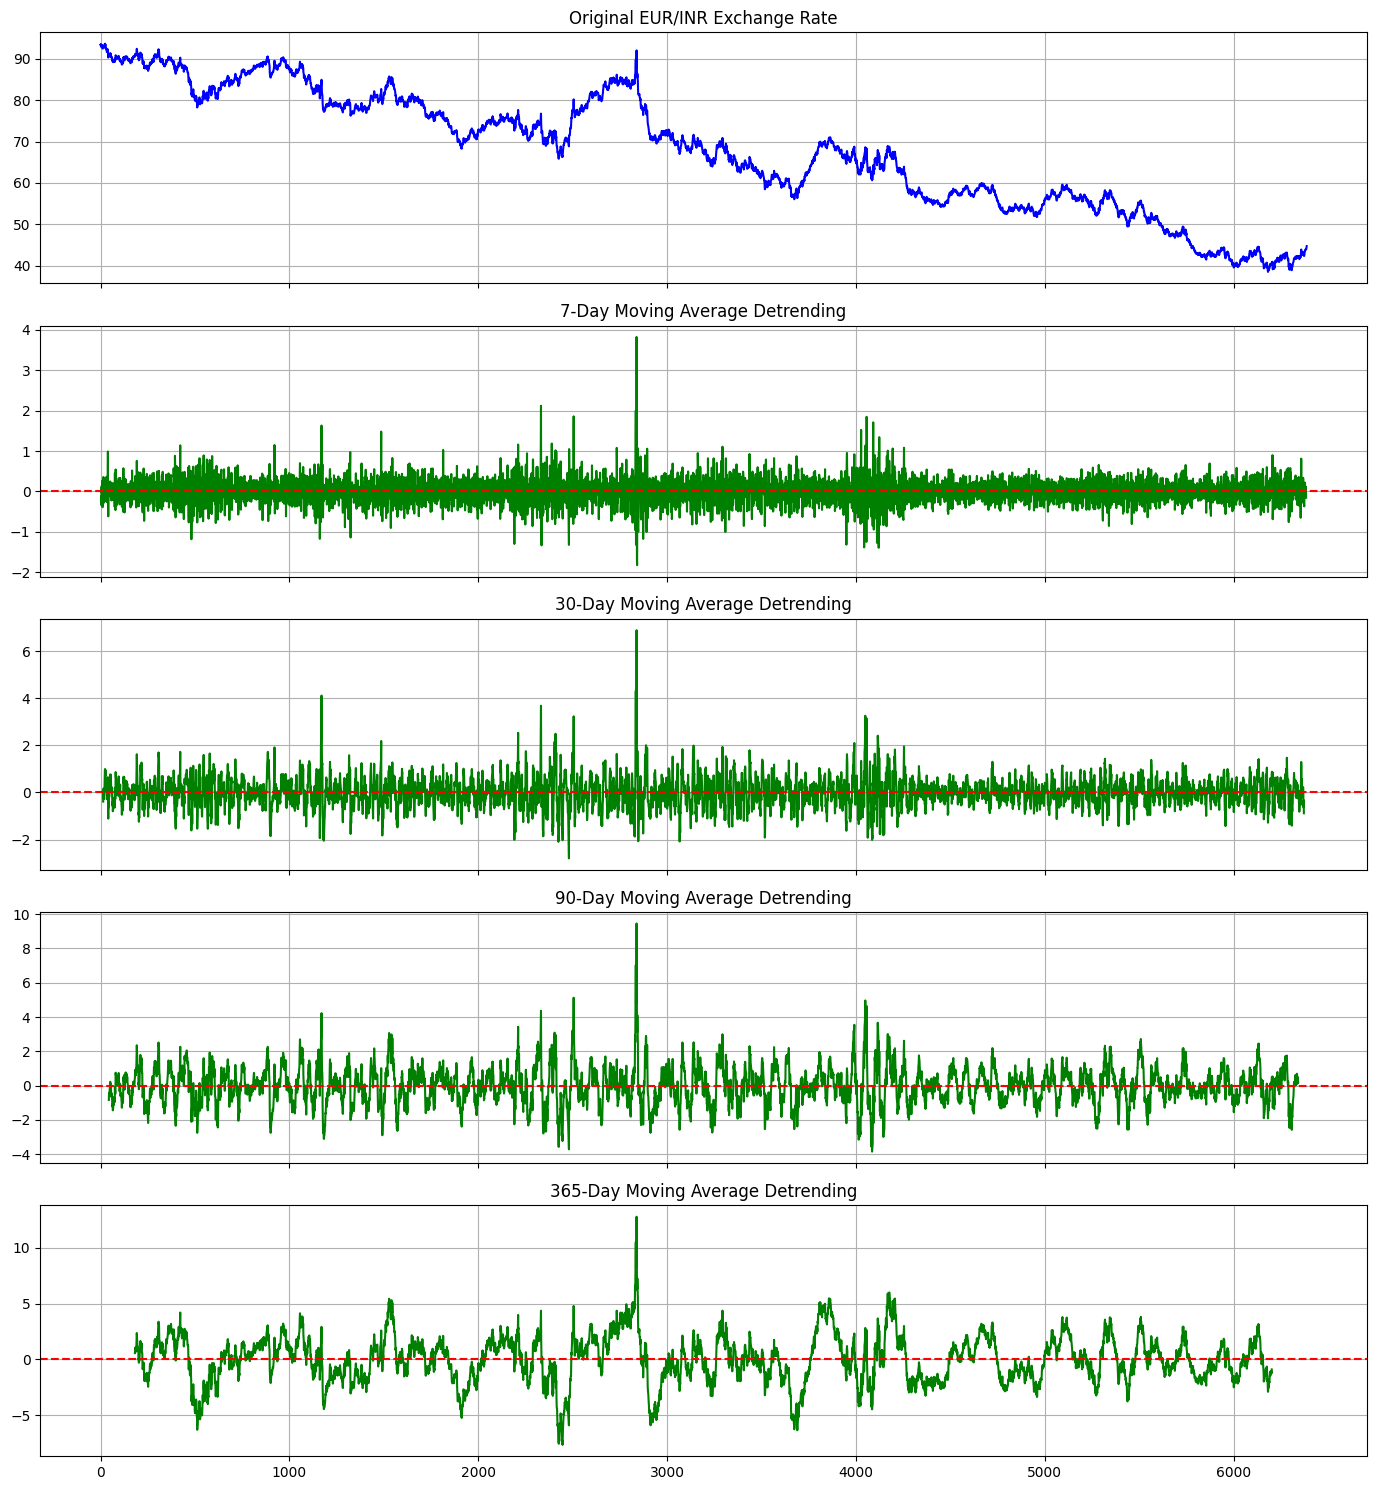


Stationarity Tests After Detrending:

7-Day MA Detrended:
ADF Statistic: -22.29590
p-value: 0.00000
=> Stationary (reject H0)

30-Day MA Detrended:
ADF Statistic: -20.03984
p-value: 0.00000
=> Stationary (reject H0)

90-Day MA Detrended:
ADF Statistic: -16.89579
p-value: 0.00000
=> Stationary (reject H0)

365-Day MA Detrended:
ADF Statistic: -7.35585
p-value: 0.00000
=> Stationary (reject H0)


<Figure size 1400x600 with 0 Axes>

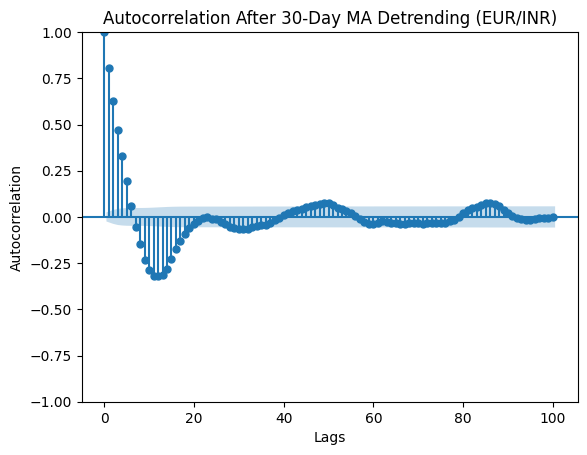

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

windows = [7, 30, 90, 365]
fig, axes = plt.subplots(nrows=len(windows)+1, ncols=1,
                        figsize=(14, 3*(len(windows)+1)),
                        sharex=True)

axes[0].plot(df_inr['[Indian rupee ]'], label='Original', color='blue')
axes[0].set_title('Original EUR/INR Exchange Rate')
axes[0].grid(True)

for i, window in enumerate(windows, start=1):
    ma = df_inr['[Indian rupee ]'].rolling(window=window, center=True).mean()

    detrended = df_inr['[Indian rupee ]'] - ma

    axes[i].plot(detrended, label=f'Detrended (Window={window})', color='green')
    axes[i].axhline(0, color='red', linestyle='--')
    axes[i].set_title(f'{window}-Day Moving Average Detrending')
    axes[i].grid(True)

    df_inr[f'detrended_{window}'] = detrended

plt.tight_layout()
plt.show()

print("\nStationarity Tests After Detrending:")
for window in windows:
    adf_result = adfuller(df_inr[f'detrended_{window}'].dropna())
    print(f"\n{window}-Day MA Detrended:")
    print(f"ADF Statistic: {adf_result[0]:.5f}")
    print(f"p-value: {adf_result[1]:.5f}")
    if adf_result[1] < 0.05:
        print("=> Stationary (reject H0)")
    else:
        print("=> Non-stationary (fail to reject H0)")

best_window = 30
plt.figure(figsize=(14, 6))
plot_acf(df_inr[f'detrended_{best_window}'].dropna(), lags=100,
         title=f'Autocorrelation After {best_window}-Day MA Detrending (EUR/INR)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

#Regression

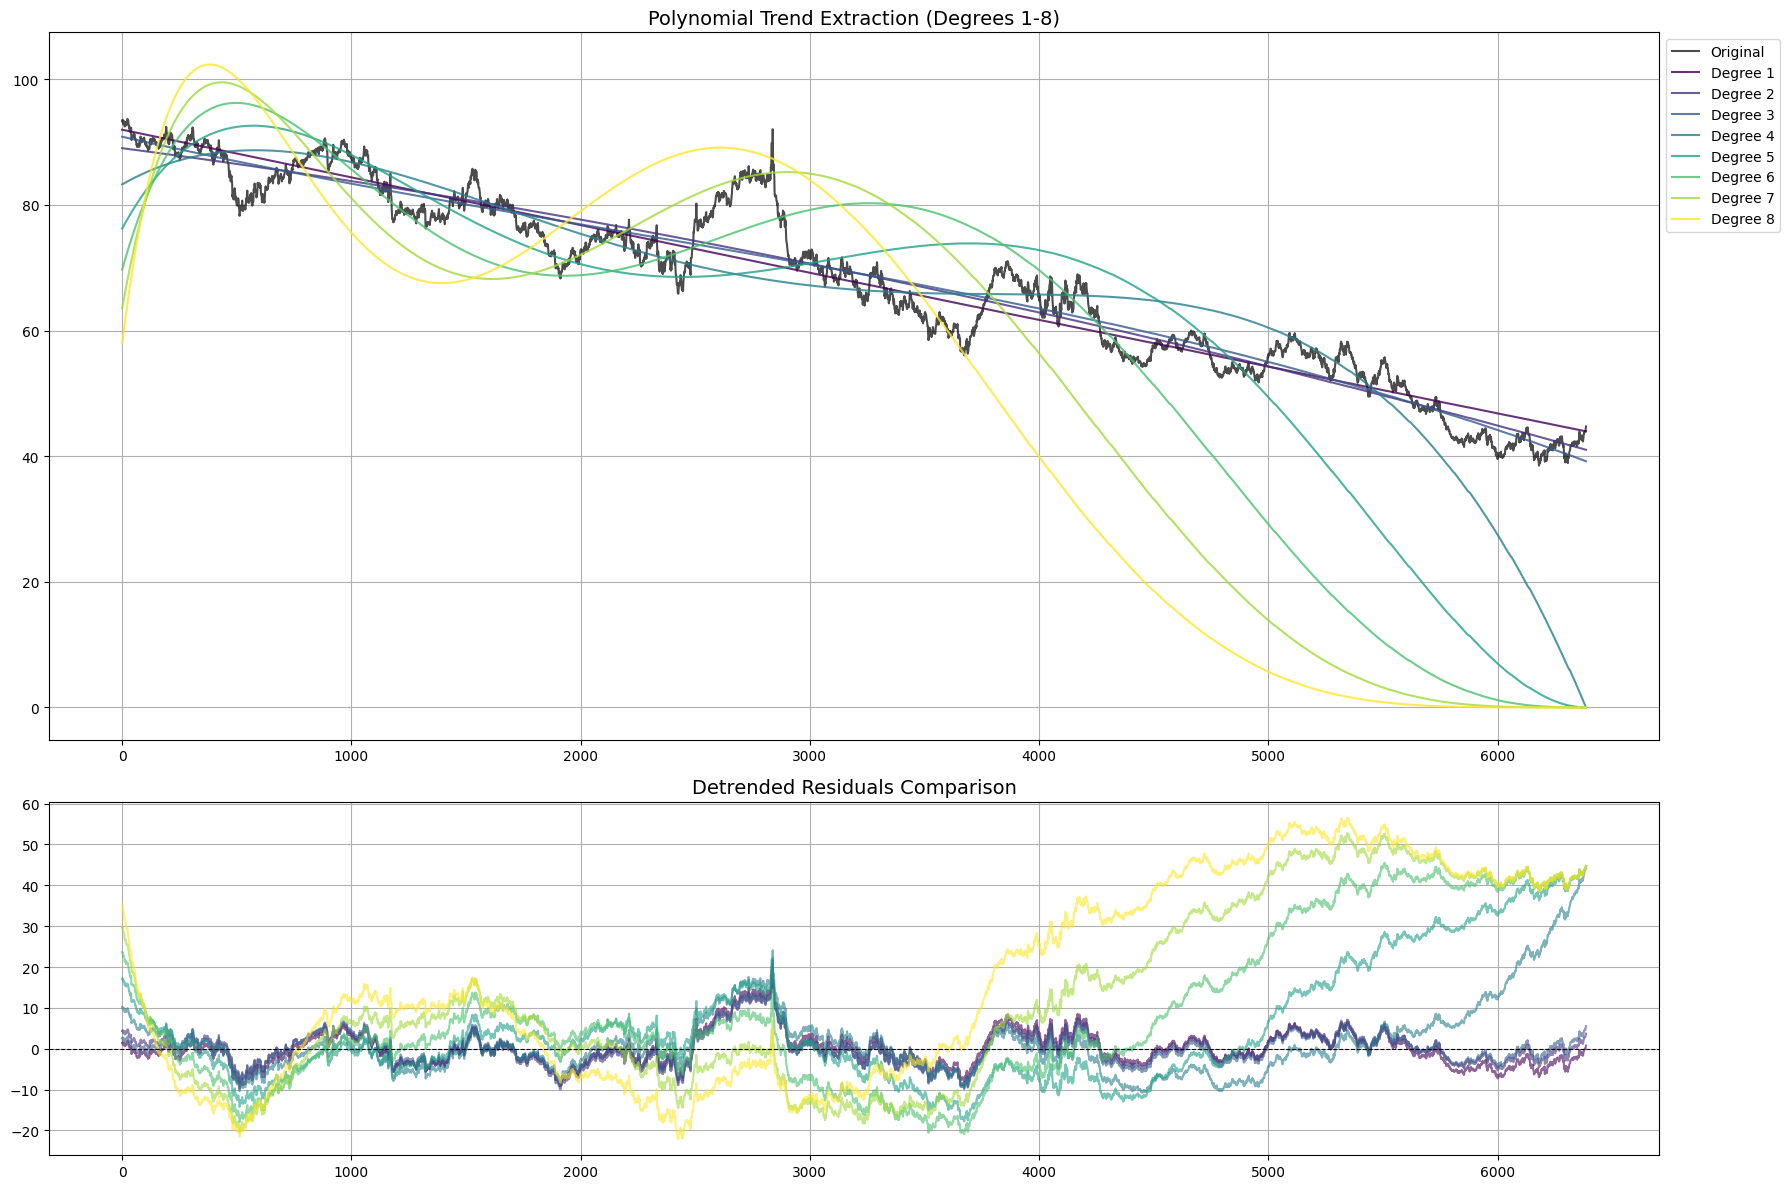

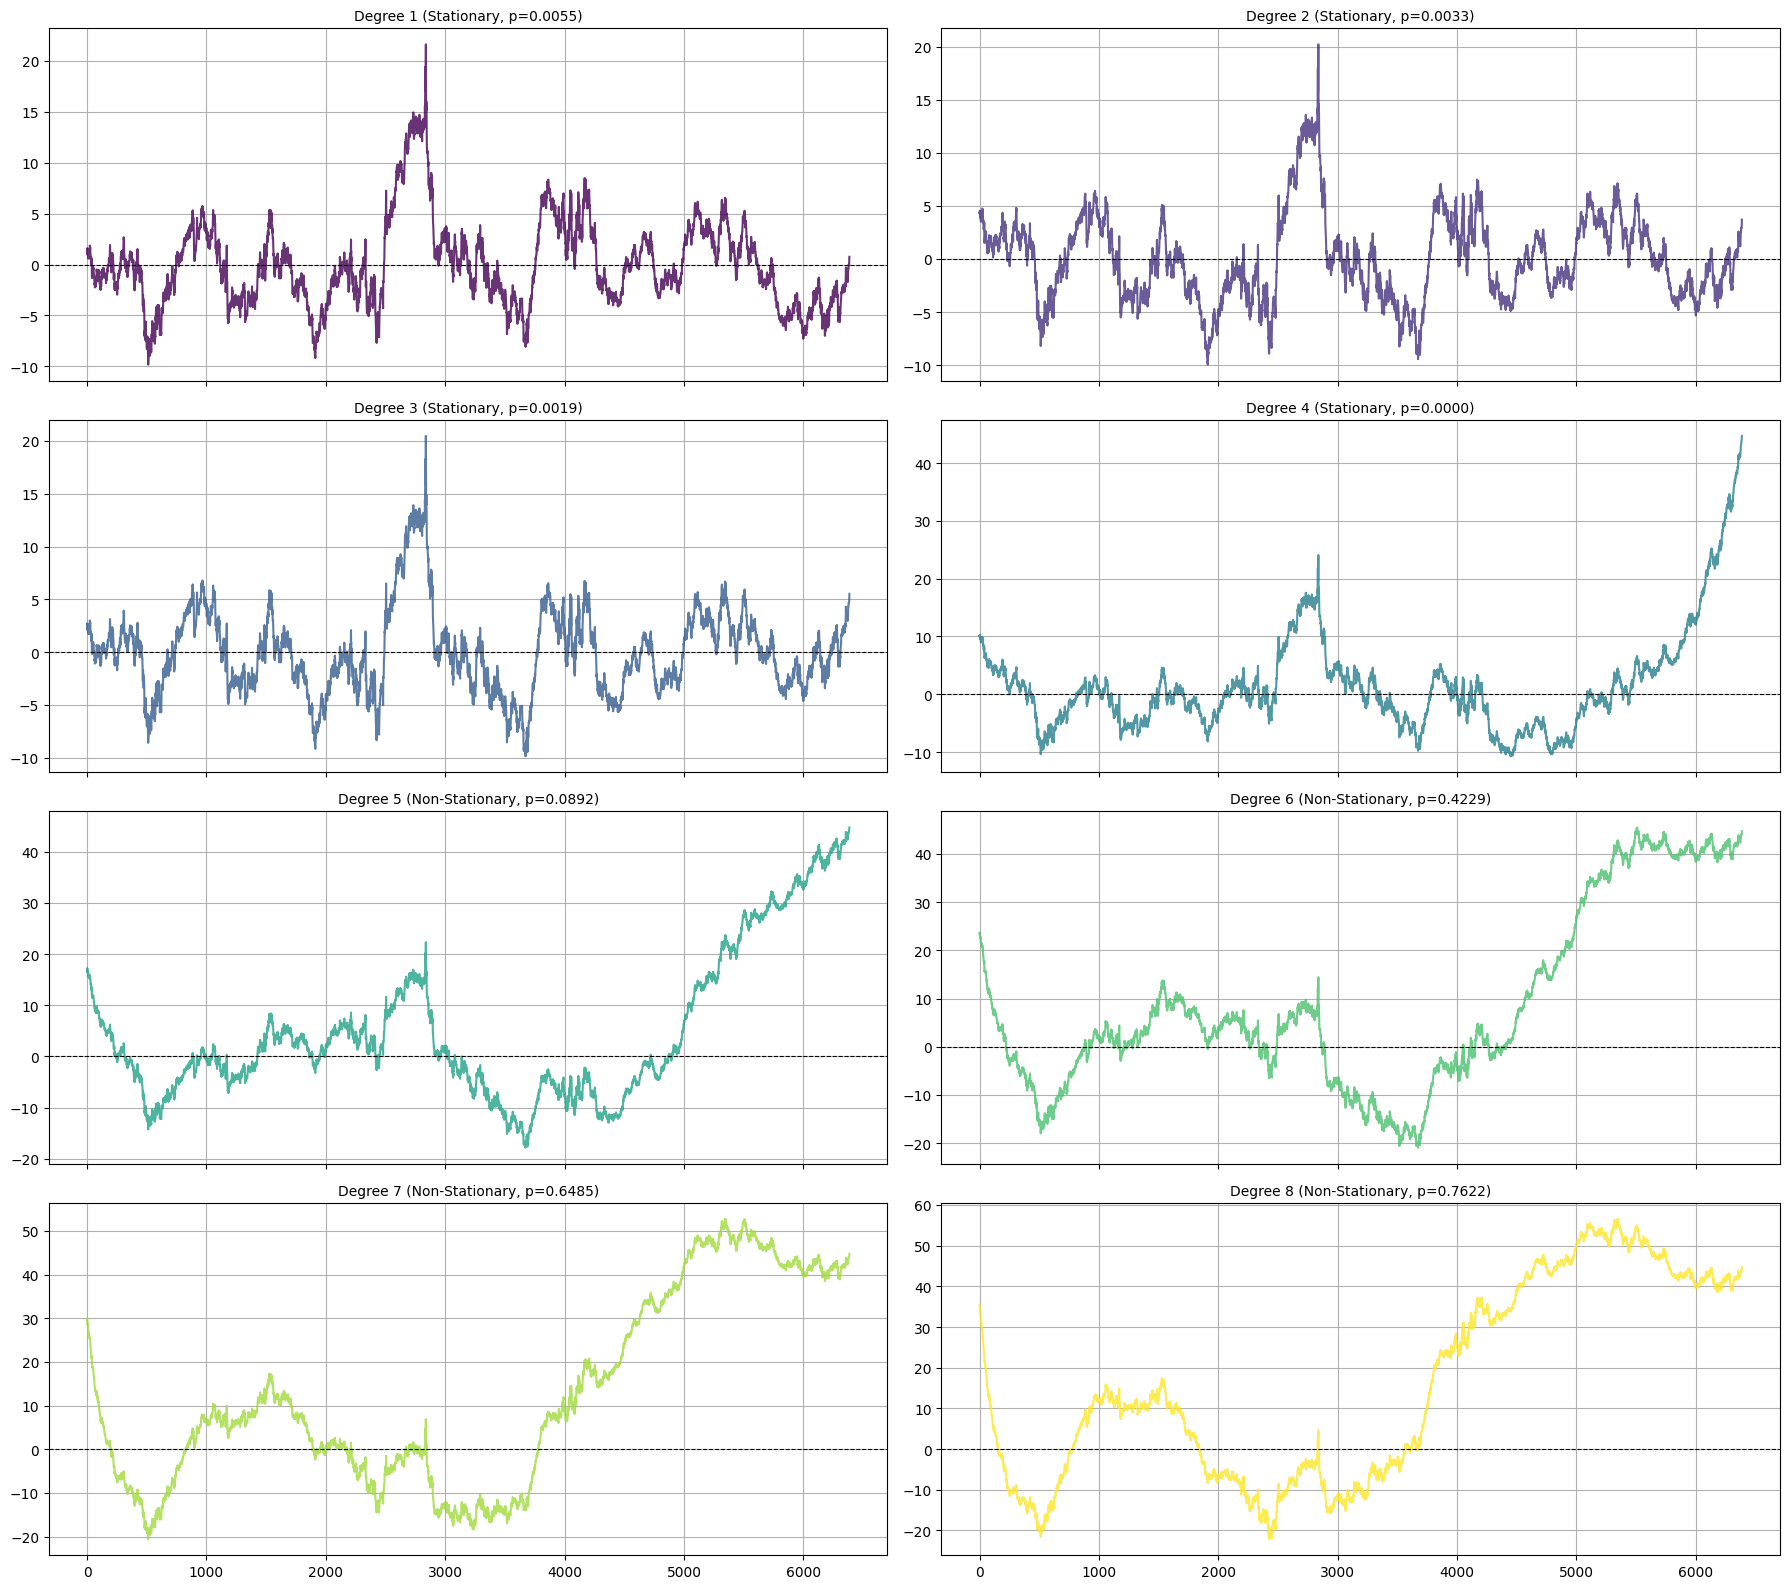


Polynomial Detrending Performance Comparison:
   Degree  ADF Statistic  p-value  Stationary     RMSE         BIC
0       1       -3.61627  0.00546        True  4.27948 36363.78542
1       2       -3.76088  0.00333        True  4.07212 35744.13595
2       3       -3.91697  0.00191        True  4.01331 35568.85079
3       4       -4.82991  0.00005        True  8.86747 45599.01867
4       5       -2.61847  0.08924       False 15.01407 52261.53729
5       6       -1.71601  0.42288       False 20.25905 56052.25048
6       7       -1.25714  0.64855       False 24.64130 58529.79044
7       8       -0.97508  0.76224       False 28.39247 60322.58162

Recommended polynomial degree: 1 (Lowest degree achieving stationarity)


<Figure size 1400x600 with 0 Axes>

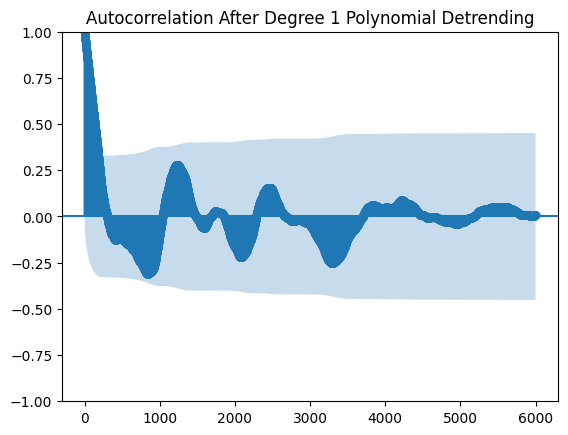

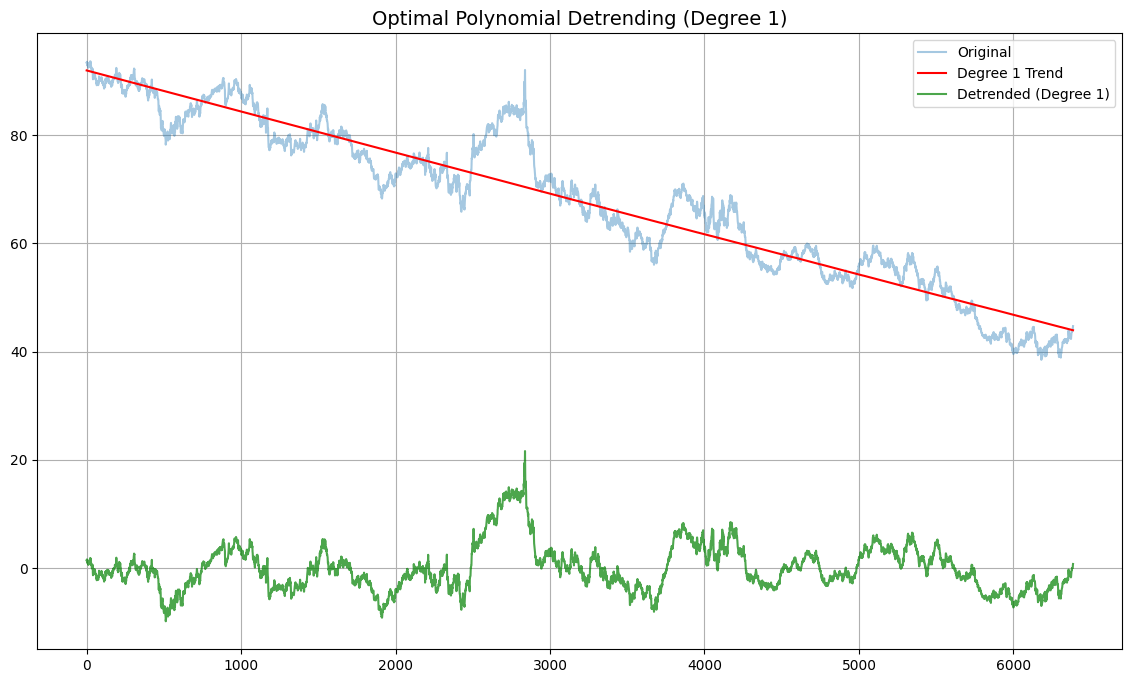

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.gridspec import GridSpec

X = np.arange(len(df_inr['[Indian rupee ]'])).reshape(-1, 1)
y = df_inr['[Indian rupee ]'].values
dates = df_inr['[Indian rupee ]'].index

degrees = range(1, 9)
colors = plt.cm.viridis(np.linspace(0, 1, len(degrees)))

fig = plt.figure(figsize=(18, 12))
gs = GridSpec(2, 1, height_ratios=[2, 1])

ax0 = plt.subplot(gs[0])
ax0.plot(dates, y, label='Original', color='black', linewidth=1.5, alpha=0.7)

ax1 = plt.subplot(gs[1], sharex=ax0)

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = sm.OLS(y, X_poly).fit()
    trend = model.predict(X_poly)
    residual = y - trend

    df_inr[f'Poly{degree}_Trend'] = trend
    df_inr[f'Poly{degree}_Detrended'] = residual

    ax0.plot(dates, trend, label=f'Degree {degree}',
             color=colors[i], alpha=0.8, linewidth=1.5)

    ax1.plot(dates, residual, color=colors[i], alpha=0.6,
             label=f'Degree {degree}')

ax0.set_title('Polynomial Trend Extraction (Degrees 1-8)', fontsize=14)
ax0.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax0.grid(True)

ax1.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax1.set_title('Detrended Residuals Comparison', fontsize=14)
ax1.grid(True)

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(4, 2, figsize=(18, 16), sharex=True)
axes = axes.flatten()

for i, degree in enumerate(degrees):
    residual = df_inr[f'Poly{degree}_Detrended']

    axes[i].plot(dates, residual, color=colors[i], alpha=0.8)
    axes[i].axhline(0, color='black', linestyle='--', linewidth=0.8)
    axes[i].set_title(f'Degree {degree} Residuals', fontsize=12)
    axes[i].grid(True)

    adf_result = adfuller(residual.dropna())
    pval = adf_result[1]
    stationarity = "Stationary" if pval < 0.05 else "Non-Stationary"
    axes[i].set_title(f'Degree {degree} ({stationarity}, p={pval:.4f})', fontsize=10)

plt.tight_layout()
plt.show()


results = []
for degree in degrees:
    residual = df_inr[f'Poly{degree}_Detrended'].dropna()
    adf_result = adfuller(residual)

    rmse = np.sqrt(np.mean(residual**2))

    results.append({
        'Degree': degree,
        'ADF Statistic': adf_result[0],
        'p-value': adf_result[1],
        'Stationary': adf_result[1] < 0.05,
        'RMSE': rmse,
        'BIC': sm.OLS(y, PolynomialFeatures(degree).fit_transform(X)).fit().bic
    })

results_df = pd.DataFrame(results)
print("\nPolynomial Detrending Performance Comparison:")
print(results_df.to_string(float_format="%.5f"))

best_degree = results_df.loc[results_df['Stationary'], 'Degree'].min()
print(f"\nRecommended polynomial degree: {best_degree} (Lowest degree achieving stationarity)")

plt.figure(figsize=(14, 6))
plot_acf(df_inr[f'Poly{best_degree}_Detrended'].dropna(), lags=6000,
         title=f'Autocorrelation After Degree {best_degree} Polynomial Detrending')
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(dates, y, label='Original', alpha=0.4)
plt.plot(dates, df_inr[f'Poly{best_degree}_Trend'],
         label=f'Degree {best_degree} Trend', color='red')
plt.plot(dates, df_inr[f'Poly{best_degree}_Detrended'],
         label=f'Detrended (Degree {best_degree})', color='green', alpha=0.7)
plt.title(f'Optimal Polynomial Detrending (Degree {best_degree})', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

#Differencing

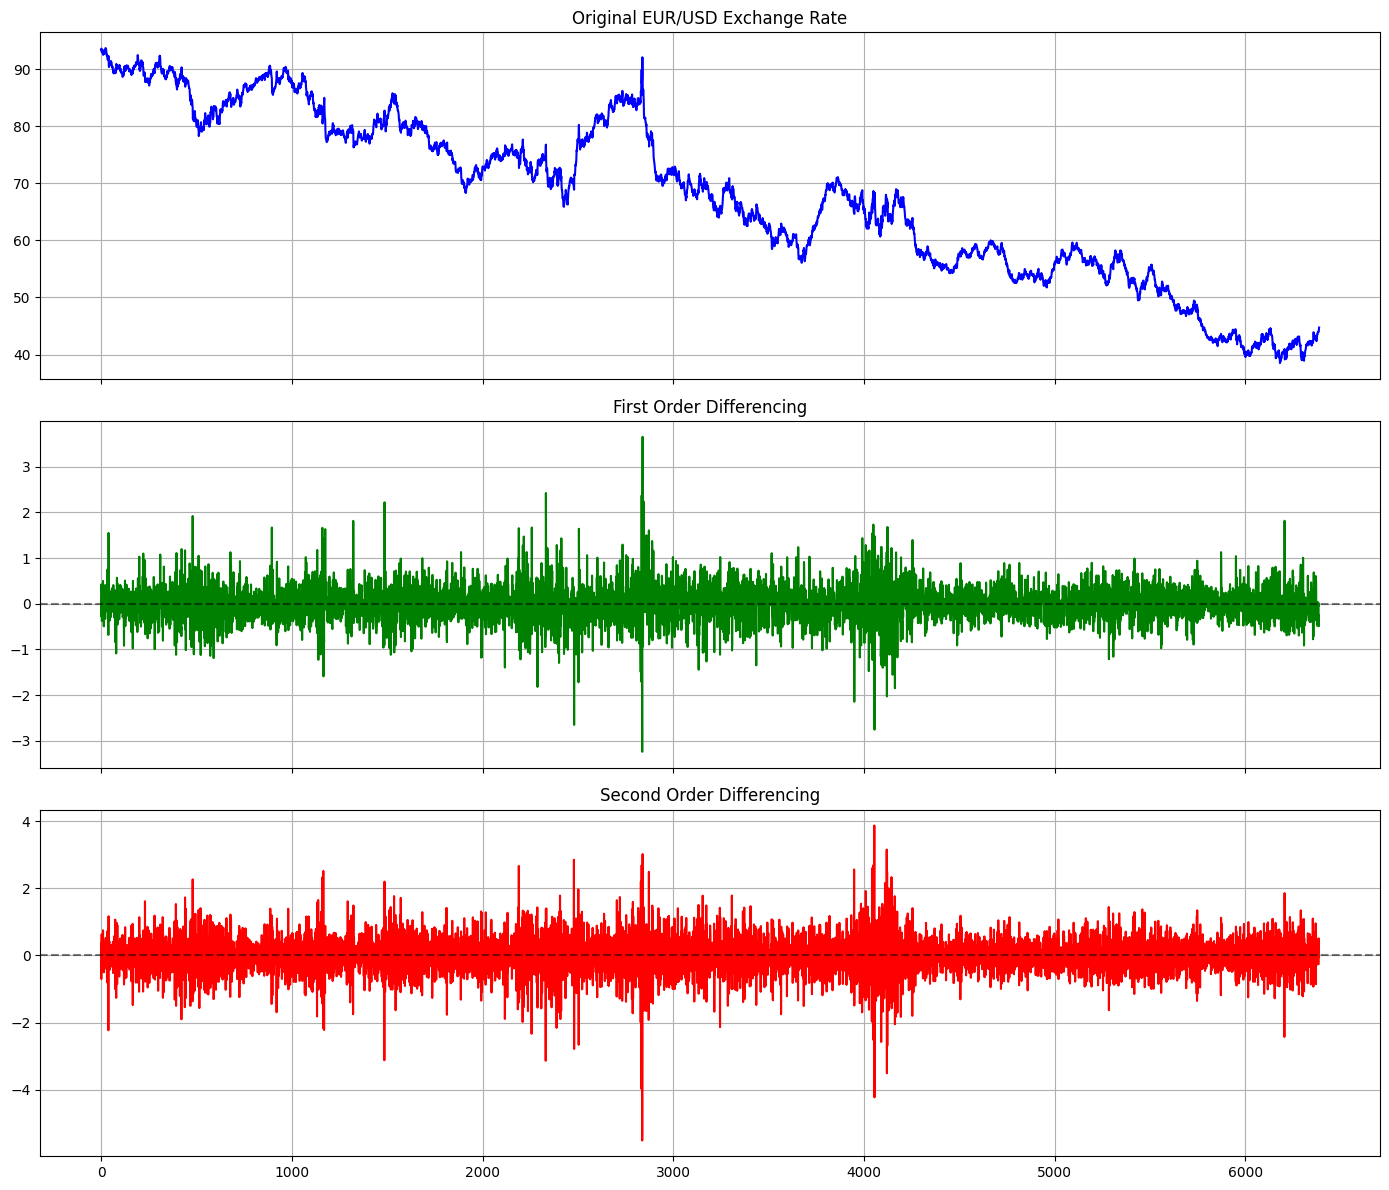


Original Series:
ADF Statistic: -1.01284
p-value: 0.74855
Critical Values:
   1%: -3.43139
   5%: -2.86200
   10%: -2.56701
=> Non-stationary (fail to reject H0)

First Differences:
ADF Statistic: -25.86483
p-value: 0.00000
Critical Values:
   1%: -3.43139
   5%: -2.86200
   10%: -2.56701
=> Stationary (reject H0)


<Figure size 1400x400 with 0 Axes>

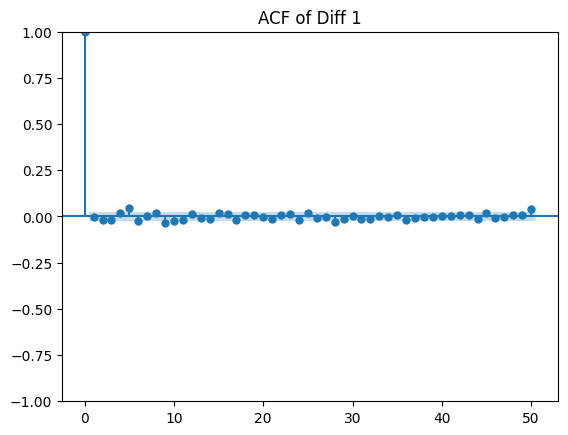

<Figure size 1400x400 with 0 Axes>

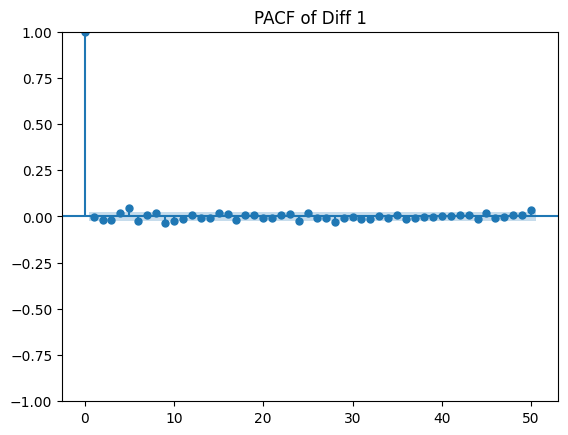


Final detrended series (diff 1):
Mean: 0.007693
Std Dev: 0.398250


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df_inr['diff_1'] = df_inr['[Indian rupee ]'].diff()
df_inr['diff_2'] = df_inr['diff_1'].diff()

fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

axes[0].plot(df_inr['[Indian rupee ]'], label='Original', color='blue')
axes[0].set_title('Original EUR/USD Exchange Rate')
axes[0].grid(True)

axes[1].plot(df_inr['diff_1'], label='First Differences', color='green')
axes[1].axhline(0, color='k', linestyle='--', alpha=0.5)
axes[1].set_title('First Order Differencing')
axes[1].grid(True)

axes[2].plot(df_inr['diff_2'], label='Second Differences', color='red')
axes[2].axhline(0, color='k', linestyle='--', alpha=0.5)
axes[2].set_title('Second Order Differencing')
axes[2].grid(True)

plt.tight_layout()
plt.show()

def check_stationarity(series, name):
    adf_result = adfuller(series.dropna())
    print(f"\n{name}:")
    print(f"ADF Statistic: {adf_result[0]:.5f}")
    print(f"p-value: {adf_result[1]:.5f}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value:.5f}")
    if adf_result[1] < 0.05:
        print("=> Stationary (reject H0)")
        return True
    else:
        print("=> Non-stationary (fail to reject H0)")
        return False

check_stationarity(df_inr['[Indian rupee ]'], "Original Series")
is_stationary = check_stationarity(df_inr['diff_1'], "First Differences")

if not is_stationary:
    check_stationarity(df_inr['diff_2'], "Second Differences")

best_diff = 'diff_2' if not is_stationary else 'diff_1'
plt.figure(figsize=(14, 4))
plot_acf(df_inr[best_diff].dropna(), lags=50, title=f'ACF of {best_diff.replace("_", " ").title()}')
plt.show()

plt.figure(figsize=(14, 4))
plot_pacf(df_inr[best_diff].dropna(), lags=50, title=f'PACF of {best_diff.replace("_", " ").title()}')
plt.show()

final_detrended = df_inr[best_diff].dropna()
print(f"\nFinal detrended series ({best_diff.replace('_', ' ')}):")
print(f"Mean: {final_detrended.mean():.6f}")
print(f"Std Dev: {final_detrended.std():.6f}")